## Задание 2. Регрессия (бриллианты)

1. Загрузите набор данных о бриллиантах: https://www.kaggle.com/datasets/shivam2503/diamonds
1. Создайте ноутбук в Google Colab и подключите к нему скачанный набор данных.
1. Проведите первичное статистическое исследование количественных (минимальный, максимальный значения столбцов, медиана и т.п.) и категориальных признаков.
1. Определите наличие пропусков и дубликатов в данных. При необходимости заполните пропуски и удалите дубликаты.
1. Визуализируйте распределение некоторых признаков.
1. Проверьте наличие отклонений и аномалий в распределении значений признаков. При необходимости удалите их.
1. Рассмотрите категориальные признаки, выберите наиболее подходящий способ кодирования для каждого.
1. Визуализируйте зависимости в признаках.
1. Постройте "тепловую карту" зависимости признаков.
1. Нормализуйте признаки.
1. Постройте линейную регрессию. Оцените результат с помощью метрик r2 и MSE.
1. Постройте полиномиальную регрессию. Сравните результаты с предыдущими.
1. Используйте другой тип регрессии (на ваш выбор) и сравните результаты.


In [82]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
pd.set_option('display.max_columns',0)

<Figure size 1500x1500 with 0 Axes>

In [83]:
# from google.colab import files

# files.upload()

In [84]:
diamonds = pd.read_csv('diamonds.csv')

diamonds.drop(columns='Unnamed: 0', inplace=True)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Набор данных содержит 11 столбцов и 53940 строки. Выведем статистические данные с помощью метода describe.


In [85]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [86]:
diamonds.describe(include='object')

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


В данном наборе данных признаки "cut", "color" и "clarity" являются номинальными.

cut -- качество огранки(Fair - удовлетворительное, Good - хорошее, Very Good - очень хорошее, Premium - премиальное, Ideal - идеальное).

color -- цвет брилианта(J, I, H, G, F, E, D, где J - худший, а D - лучший).

clarity -- показатель "чистоты" бриллианта (I1 (худший), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (лучший)).

Остальные признаки, такие как вес, цена и геометрические размеры являются числовыми.

price -- цена в долларах США (\$326--\$18,823).

carat -- вес бриллианта (0,2--5,01).

x -- длина в мм (0--10,74).

y -- толщина в мм (0--58,9).

z -- глубина в мм (0--31,8).

depth -- общая "глубина" брилианта(43--79).

table -- площадь верхней поверхности брилианта (43--95).


# Поиск пропусков и дубликатов


Метод describe приводит общую статистику по конкретным полям таблицы. Но для полного представления о данных нужно знать типы полей, количество непустых записей и т.п.


In [87]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Смотрим сколько пропусков имеет каждый столбец


In [88]:
diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Данные не содержат пустых значений.


In [89]:
# количество дубликатов
diamonds.duplicated().sum()

146

Данные содержат повторяющиеся строки, которые можно удалить.


In [90]:
diamonds.drop_duplicates()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Можно заметить, что количество строк уменьшилось на 146 позиций, как и было вычислено ранее.


# Поиск выбросов


Так как для номинальных данных нет возможности найти выбросы, будем искать их для числовых.


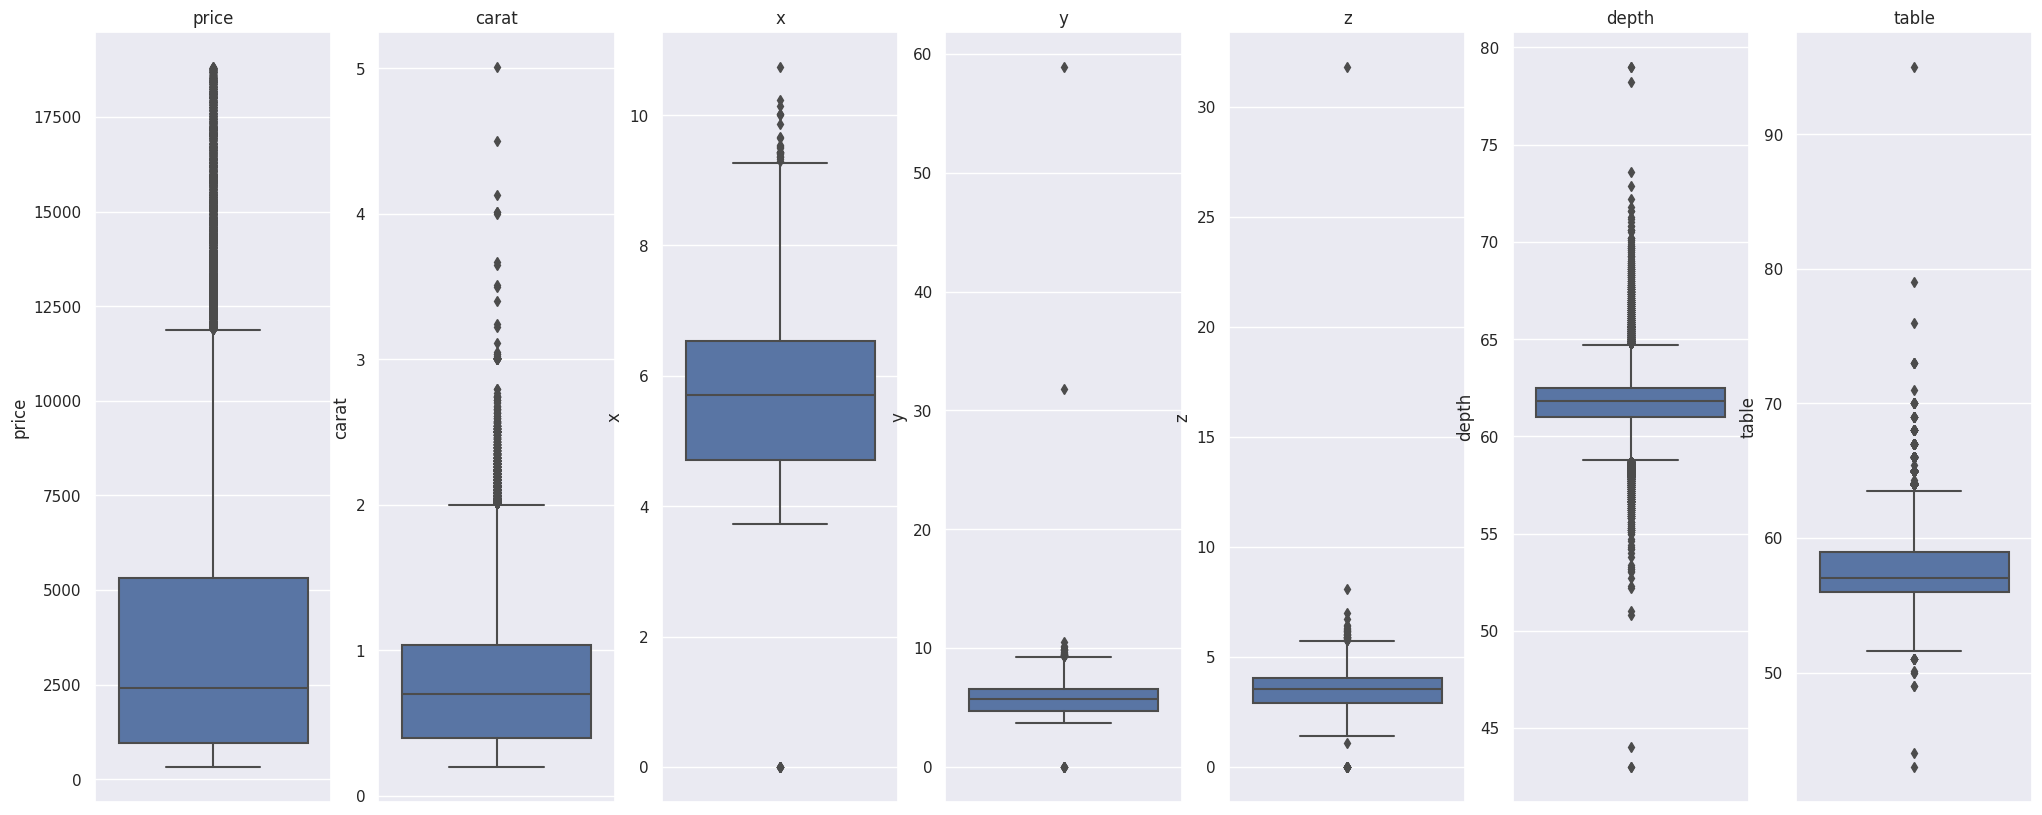

In [91]:
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(25,10))
idx = 0
for i in ['price','carat','x', 'y', 'z', 'depth', 'table']:
    sns.boxplot(y=diamonds[i], ax=axes[idx]).set_title(i)
    idx += 1
plt.show()

Как видно из графиков разброса, набор данных содержит выбросы, что нормально, так как в природе могут встречаться алмазы, размеры которых превосходят среднестатистические, из которых в последствии получают брилианты больших размеров. Однако выбросы, сильно отдаленные от центра разброса, стоит "обработать".

Так как по сравнению с общим колличеством наблюдений в выборке, колличество наблюдений с выбросами не велико, то наблюдения с выбросами можно удалить.


In [92]:
diamonds.drop(diamonds[(diamonds.carat < 0.2)| (diamonds.carat > 3)].index, inplace=True)
diamonds.drop(diamonds[(diamonds.x < 4) | (diamonds.x > 9)].index, inplace=True)
diamonds.drop(diamonds[(diamonds.y < 4) | (diamonds.y > 9)].index, inplace=True)
diamonds.drop(diamonds[(diamonds.z < 2)| (diamonds.z > 5.5)].index, inplace=True)                      
diamonds.drop(diamonds[(diamonds.depth < 50)| (diamonds.depth > 75)].index, inplace=True)                         
diamonds.drop(diamonds[(diamonds.table < 51)| (diamonds.table >63)].index, inplace=True)                        
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39
10,0.30,Good,J,SI1,64.0,55.0,339,4.25,4.28,2.73
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Как видно в выборке осталось 53403 наблюдений из 53794, то есть 821 наблюдаемых брилиантов было отброшено.

В общей сложности после удаления повторов и выбросов было удалено 977 наблюдений.


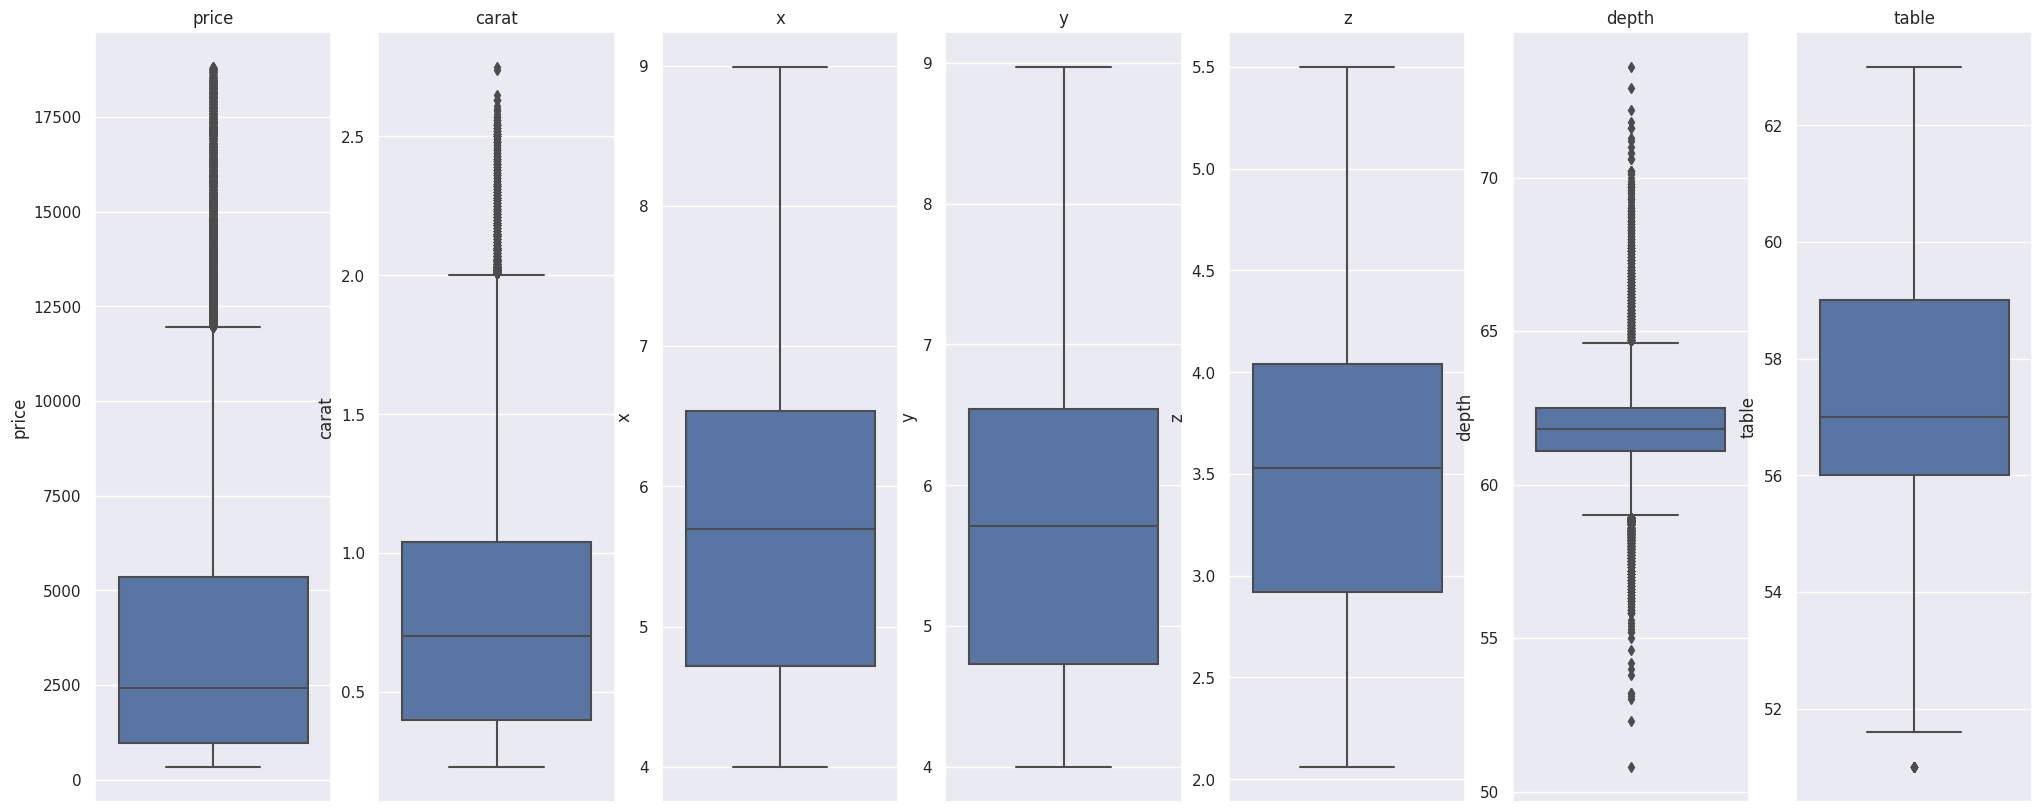

In [93]:
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(25,10))
idx = 0
for i in ['price','carat','x', 'y', 'z', 'depth', 'table']:
    sns.boxplot(y=diamonds[i], ax=axes[idx]).set_title(i)
    idx += 1
plt.show()

# Обработка номинальных признаков


In [94]:
diamonds2 = diamonds.copy()

OneHotEncoder используется для преобразования категориальных или текстовых данных в числа, их модели понимают лучше.


In [95]:
from sklearn.preprocessing import OneHotEncoder

for fe in ['clarity','cut','color']:
  onehotencoder = OneHotEncoder()
  res = onehotencoder.fit_transform(diamonds2[[fe]])
  onehotencoder.categories_

  diamonds2[onehotencoder.categories_[0]] = res.toarray()

diamonds2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2,Fair,Good,Ideal,Premium,Very Good,D,E,F,G,H,I,J
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10,0.30,Good,J,SI1,64.0,55.0,339,4.25,4.28,2.73,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [96]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

diamonds2[['color']] = enc.fit_transform(diamonds2[['color']])
diamonds2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2,Fair,Good,Ideal,Premium,Very Good,D,E,F,G,H,I,J
3,0.29,Premium,5.0,VS2,62.4,58.0,334,4.20,4.23,2.63,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.31,Good,6.0,SI2,63.3,58.0,335,4.34,4.35,2.75,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.26,Very Good,4.0,SI1,61.9,55.0,337,4.07,4.11,2.53,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.23,Very Good,4.0,VS1,59.4,61.0,338,4.00,4.05,2.39,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10,0.30,Good,6.0,SI1,64.0,55.0,339,4.25,4.28,2.73,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Номинальным признакам можно придать числовые значения с помощью словарей.


In [97]:
dict_cut = dict((k,v+1) for v, k  in enumerate(('Fair', 'Good', 'Very Good', 'Premium', 'Ideal')))
dict_color = dict((k,v+1) for v, k in enumerate('JIHGFED'))
dict_clarity = dict((k,v+1) for v, k in enumerate(('I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF')))

In [98]:
noncat_diamonds = diamonds.copy(True)
diamonds.replace({'cut': dict_cut}, inplace=True)
diamonds.replace({'color': dict_color}, inplace=True)
diamonds.replace({'clarity': dict_clarity}, inplace=True)
diamonds[['cut','color','clarity']] = diamonds[['cut','color','clarity']].astype('category')
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75
7,0.26,3,3,3,61.9,55.0,337,4.07,4.11,2.53
9,0.23,3,3,5,59.4,61.0,338,4.00,4.05,2.39
10,0.30,2,1,3,64.0,55.0,339,4.25,4.28,2.73
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5,7,3,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,2,7,3,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,7,3,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,4,3,2,61.0,58.0,2757,6.15,6.12,3.74


# Визуализация данных


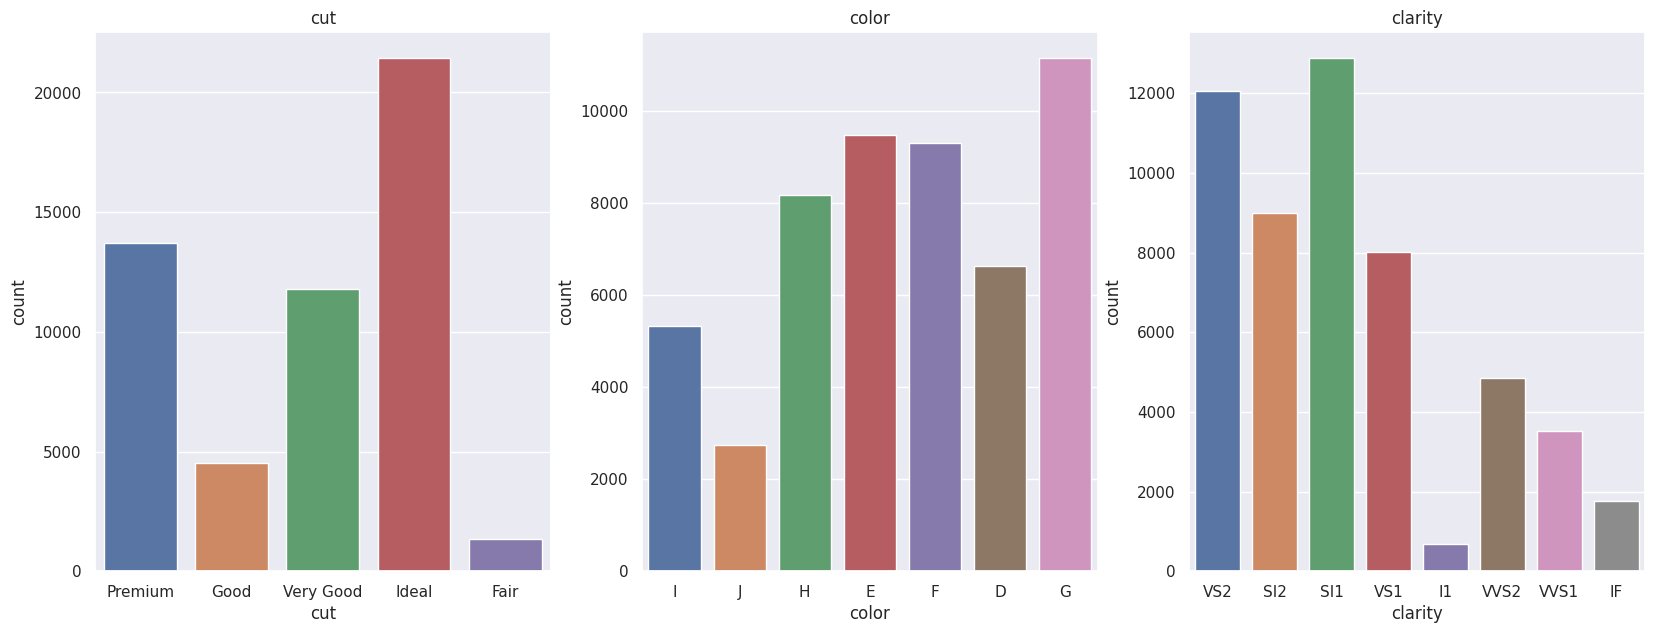

In [99]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,7))
idx = 0
for i in ['cut', 'color', 'clarity']:
    sns.countplot(data=noncat_diamonds, x=i, ax=axes[idx]).set_title(i)
    idx += 1
plt.show()

По цвету и чистоте брилианты, представленные в выборке, имеют близкое к нормальному распределение, что может быть связано с природным происхождением данных характеристик. По своей огранке бриллианты распределились по принципу, чем лучше огранка, тем больше таких камней встречается, что может быть связано со стремлением человека придать драгоценному камню наиболее идеальную форму.


In [100]:
def six_plots(data, y, x_colums=set(['cut', 'color', 'clarity', 'carat', 'table', 'depth', 'x','y','z'])):
  x_colums = set(data.select_dtypes([np.number]).columns).intersection(x_colums)
  x_colums = list(x_colums)
  fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30,20))
  idx = 0
  for i in range(3):
      if len(x_colums) > i:
        sns.lineplot(x=data[x_colums[i]], y = y, ax=axes[0][idx])
      if len(x_colums) > i+3:
        sns.lineplot(x=data[x_colums[i+3]], y = y, ax=axes[1][idx])
      if len(x_colums) > i+6:
        sns.lineplot(x=data[x_colums[i+6]], y = y, ax=axes[2][idx])
      idx += 1

  plt.show()


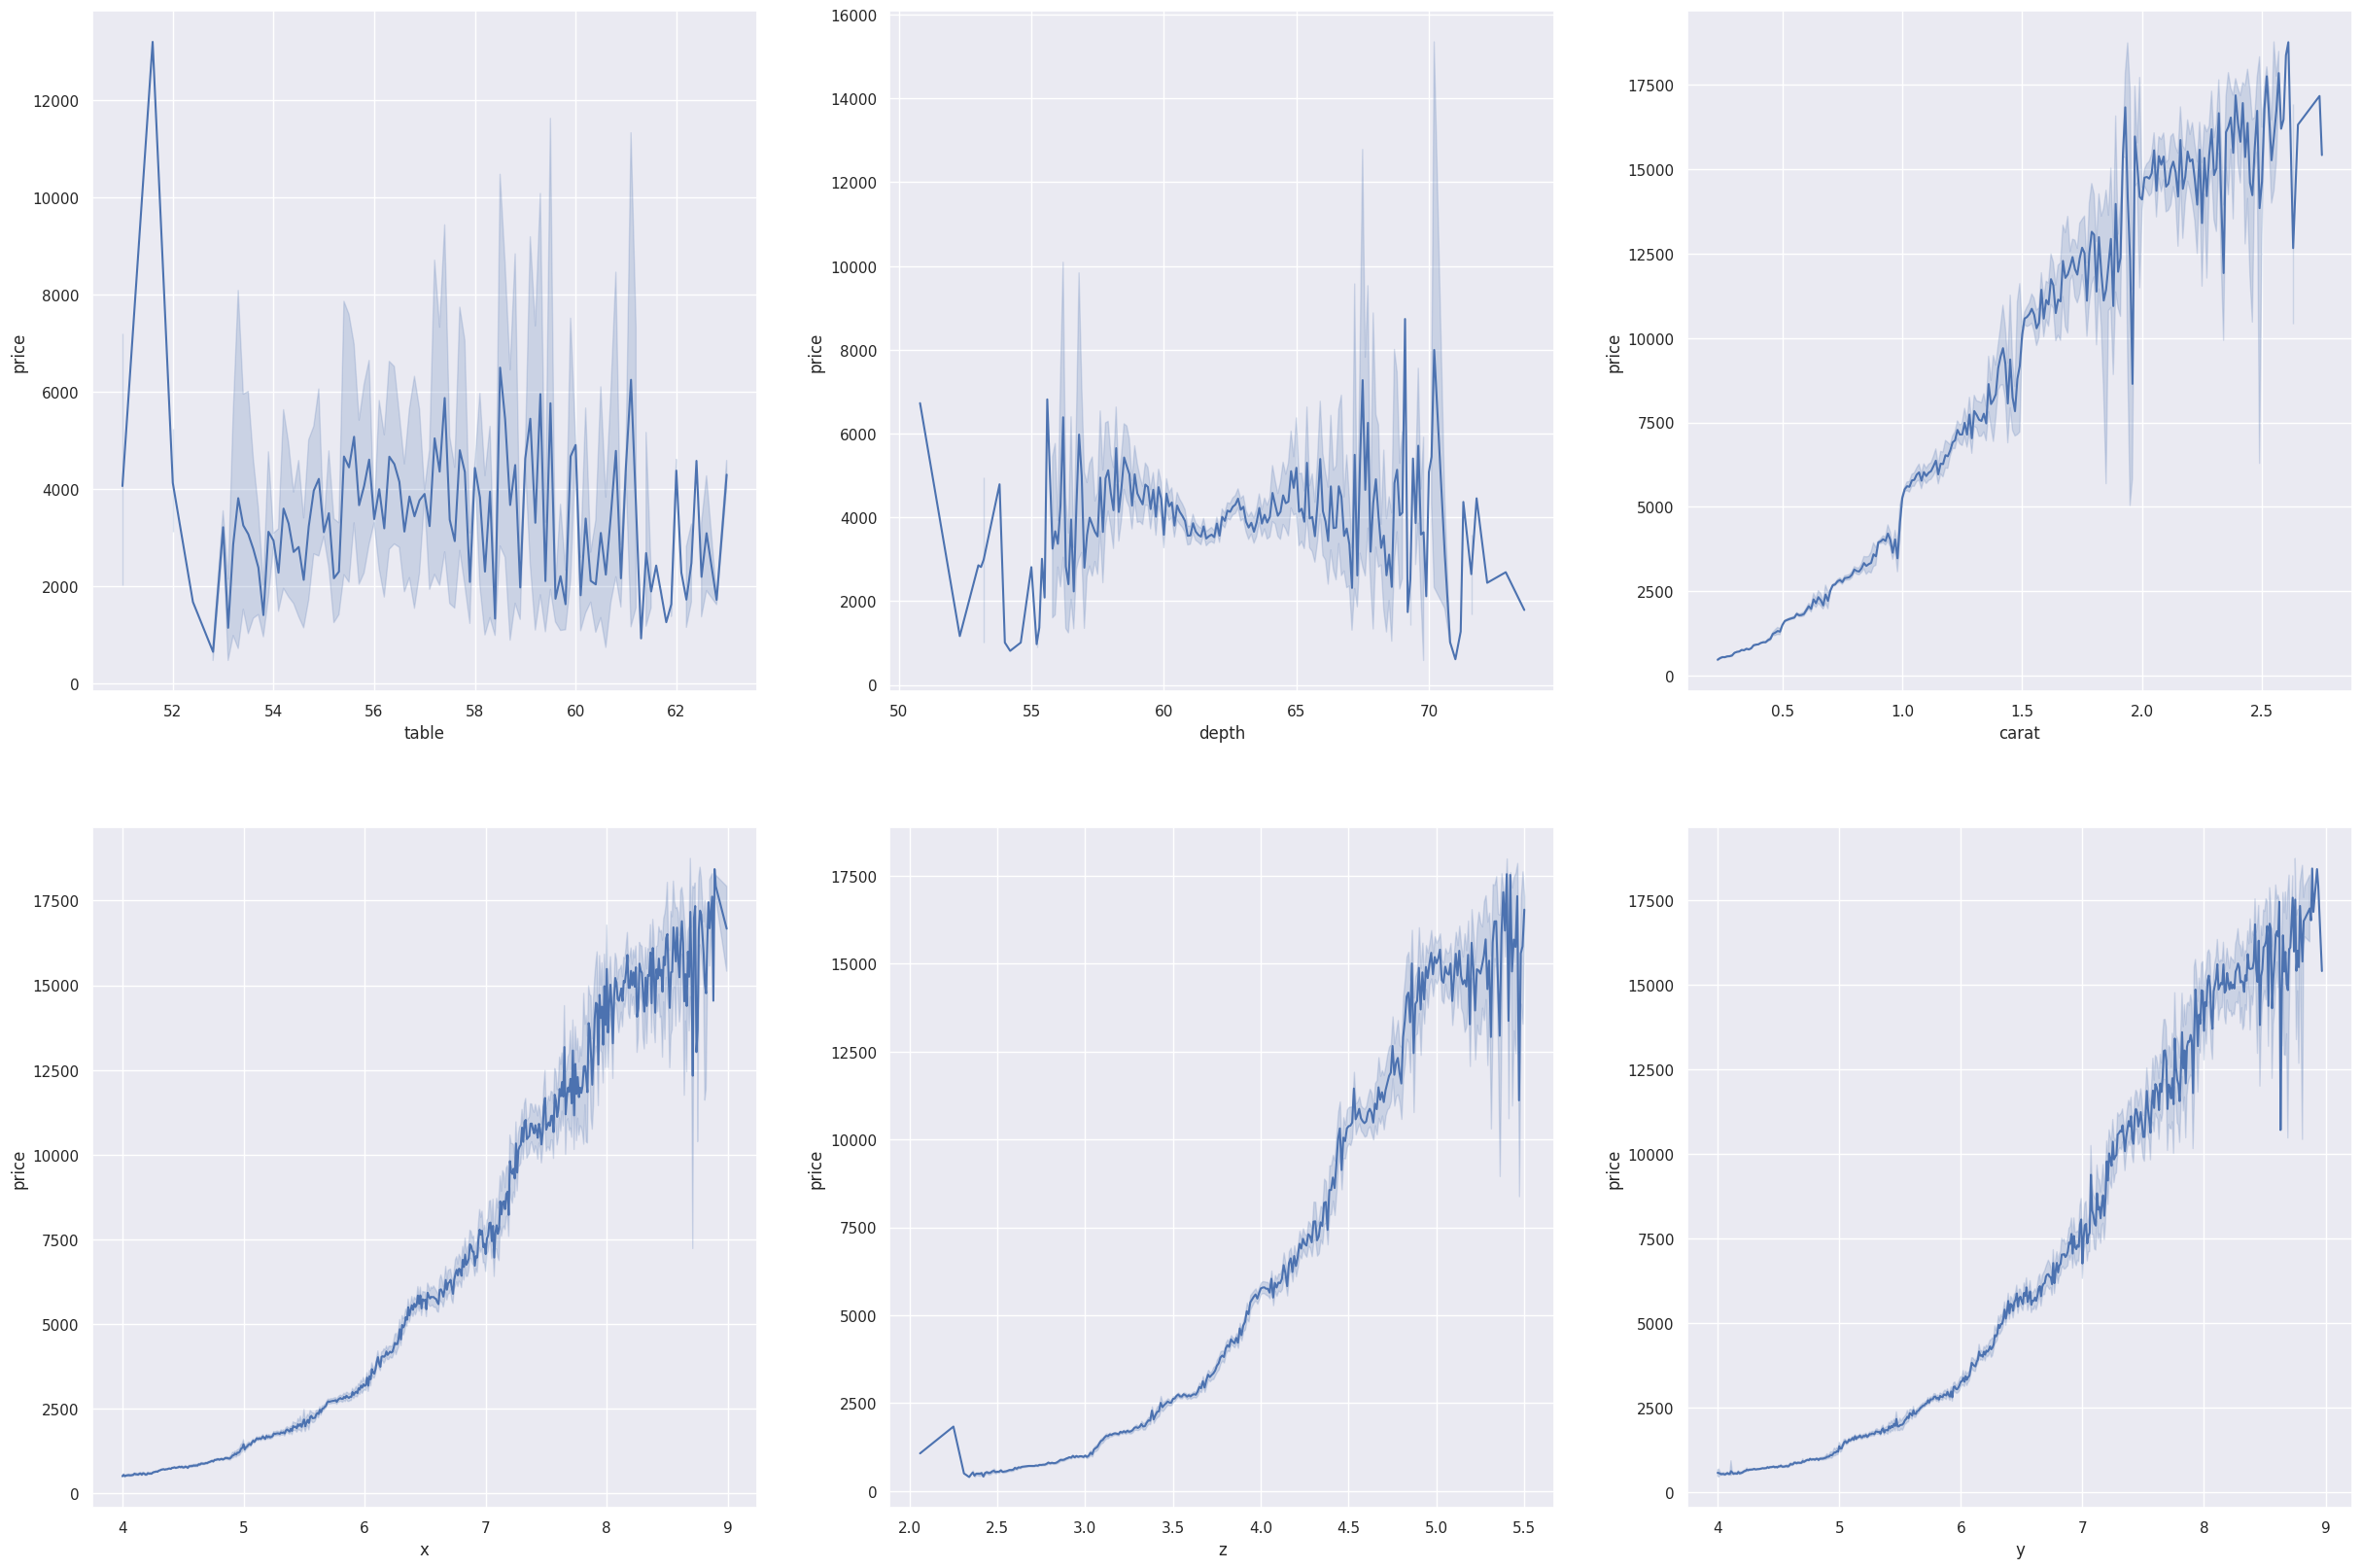

In [101]:

six_plots(diamonds, diamonds['price'])

Из графиков выше видно, что прямая зависимость цены от признака прослеживается только для признаков x, y, z и carate. Так как вес брилианта зависит главным образом от его размера, то можно сделать вывод, что в большей степени цену брилианта определяет его размер.


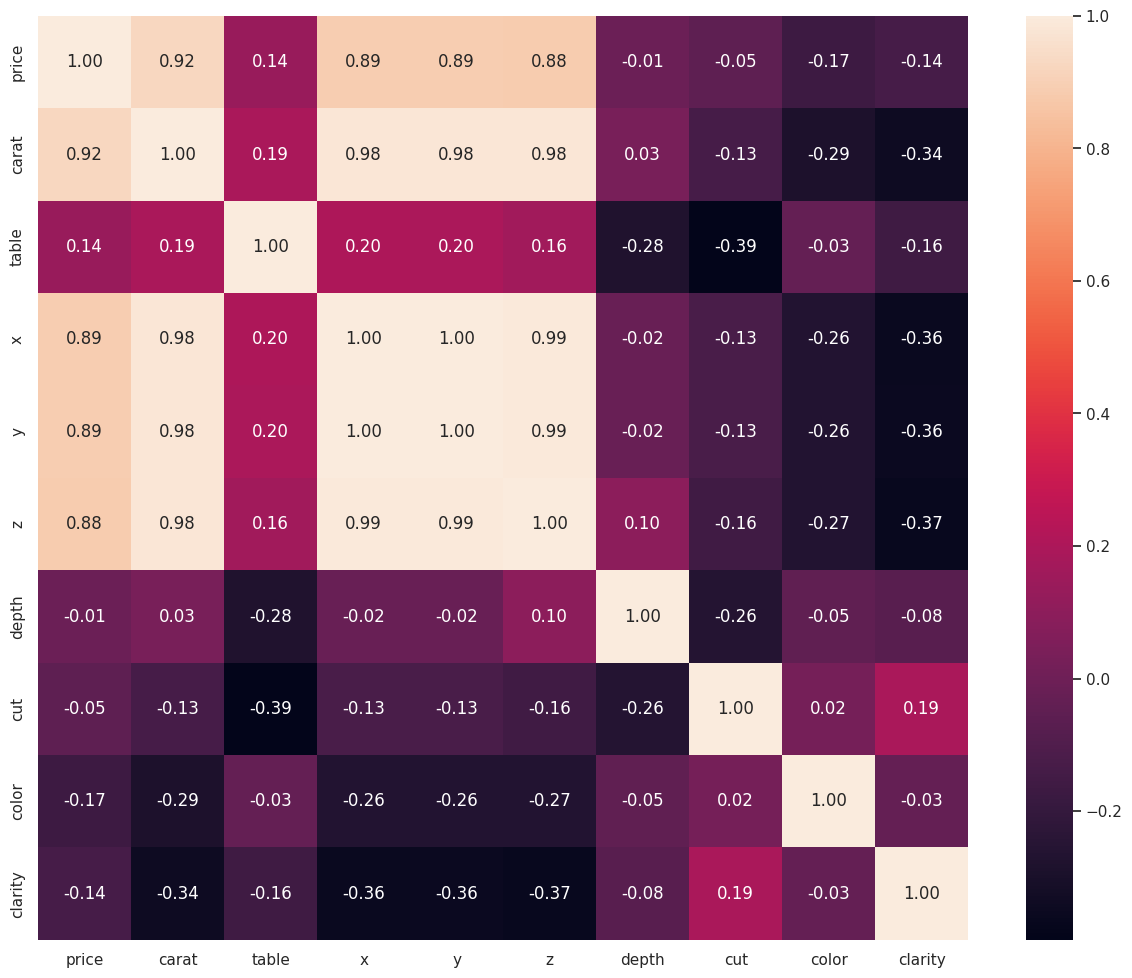

In [102]:
num_col = ['carat', 'table', 'x','y','z', 'depth']
cat_col = ['cut', 'color', 'clarity']
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15,12))
sns.heatmap(pd.concat([diamonds['price'], diamonds[num_col], diamonds[cat_col].astype('int')], axis=1).corr(), annot=True, fmt=".02f")
plt.show()

Матрица корреляций показывает, что наилучшая корреляция наблюдается между x,y,z, carat и price, что соответствует сделанным ранее выводам.


Нормализация. Применим её, чтобы сравнить как меняются значения признаков после неё. Регрессионным моделям она не важна, поэтому это просто пример.


In [103]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

diamonds[['n_x', 'n_y', 'n_z']] = scaler.fit_transform(diamonds[['x', 'y', 'z']])
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,n_x,n_y,n_z
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63,0.040080,0.046278,0.165698
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75,0.068136,0.070423,0.200581
7,0.26,3,3,3,61.9,55.0,337,4.07,4.11,2.53,0.014028,0.022133,0.136628
9,0.23,3,3,5,59.4,61.0,338,4.00,4.05,2.39,0.000000,0.010060,0.095930
10,0.30,2,1,3,64.0,55.0,339,4.25,4.28,2.73,0.050100,0.056338,0.194767


На графиках видно, что отличие заключается только в диапазоне значений. Как и должно быть.


<Axes: xlabel='n_x', ylabel='n_y'>

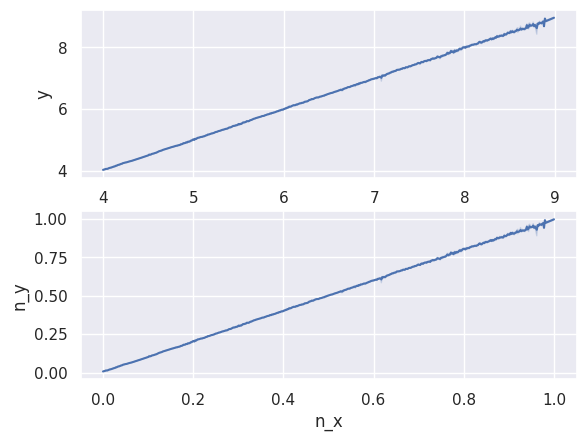

In [104]:
_, axs = plt.subplots(nrows=2)
sns.lineplot(data=diamonds, x='x', y='y', ax=axs[0])
sns.lineplot(data=diamonds, x='n_x', y='n_y', ax=axs[1])

Создадим модель линейной регрессии и применим ее к тренировочным данным


In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [106]:
X = diamonds.drop("price", axis=1)
y = diamonds["price"]

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

line_model = LinearRegression()
line_model.fit(	X_train, y_train)

y_pred = line_model.predict(X_test)

Проведем численную оценку полученного результата.


In [115]:
def model_stats(model, X_train, y_train, X_test, y_test, y_pred):
  score_train, score_test = model.score(X_train, y_train), model.score(X_test, y_test)
  r2 = r2_score(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  print(f"Train score: {score_train:.4f}")
  print(f"Test score: {score_test:.4f}")
  print(f"R2 score: {r2:.5f} ")
  print(f"MSE score: {mse:.3f} ")


In [116]:
model_stats(line_model, X_train, y_train, X_test, y_test, y_pred)

Train score: 0.9172
Test score: 0.9140
R2 score: 0.97778 
MSE score: 349574.726 


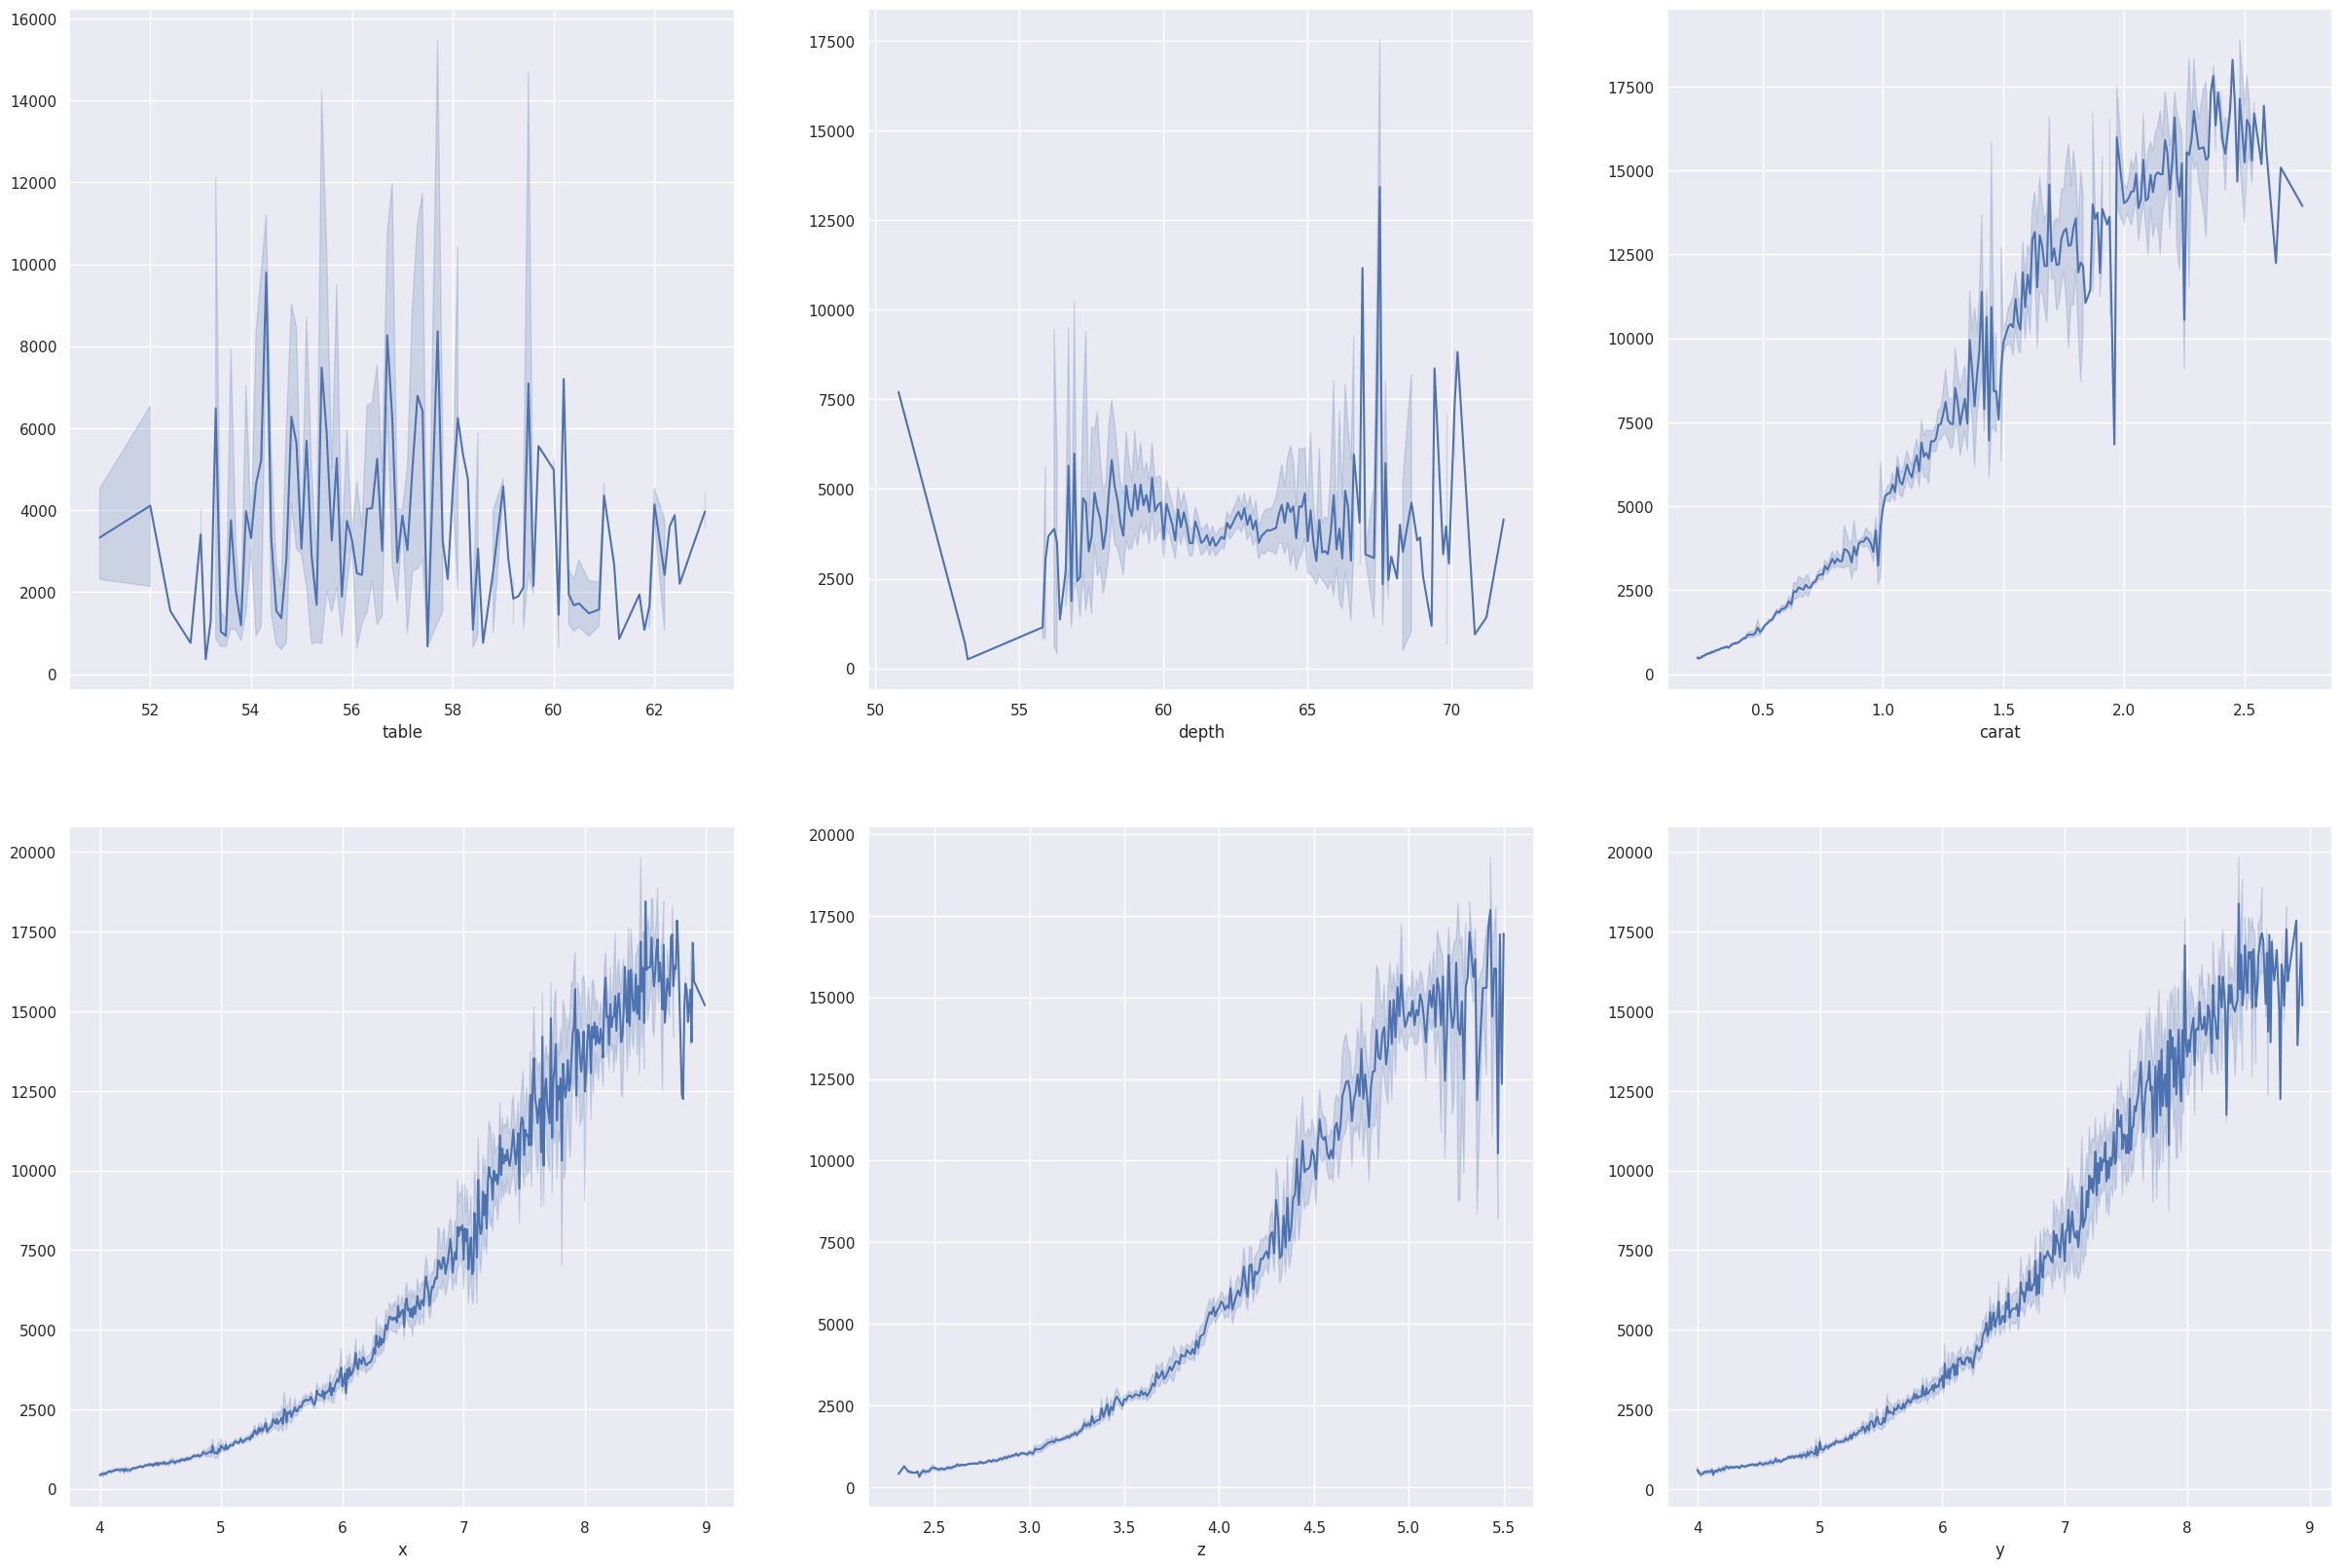

In [117]:
six_plots(X_test, y_pred)

Оценка R2 – это один из показателей оценки эффективности моделей машинного обучения на основе регрессии. Она также известна как коэффициент детерминации.

Как мы видим, стандартный метод оценки линейной модели score использует оценку r2_score.

Существуют другие методы оценок, например, среднеквадратичная ошибка - MSE.


Полиномиальная регрессия


In [118]:
from sklearn.preprocessing import PolynomialFeatures  
poly_features = PolynomialFeatures(degree=3)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = poly_features.fit_transform(X_train, y_train)
X_test = poly_features.fit_transform(X_test, y_test)
poly_model = LinearRegression()  
poly_model.fit(X_train, y_train)

y_pred = poly_model.predict(X_test)


In [119]:
model_stats(poly_model, X_train, y_train, X_test, y_test, y_pred)

Train score: 0.9788
Test score: 0.9778
R2 score: 0.97778 
MSE score: 349574.726 


Судя по метрикам, полиминальная модель переобучилась.


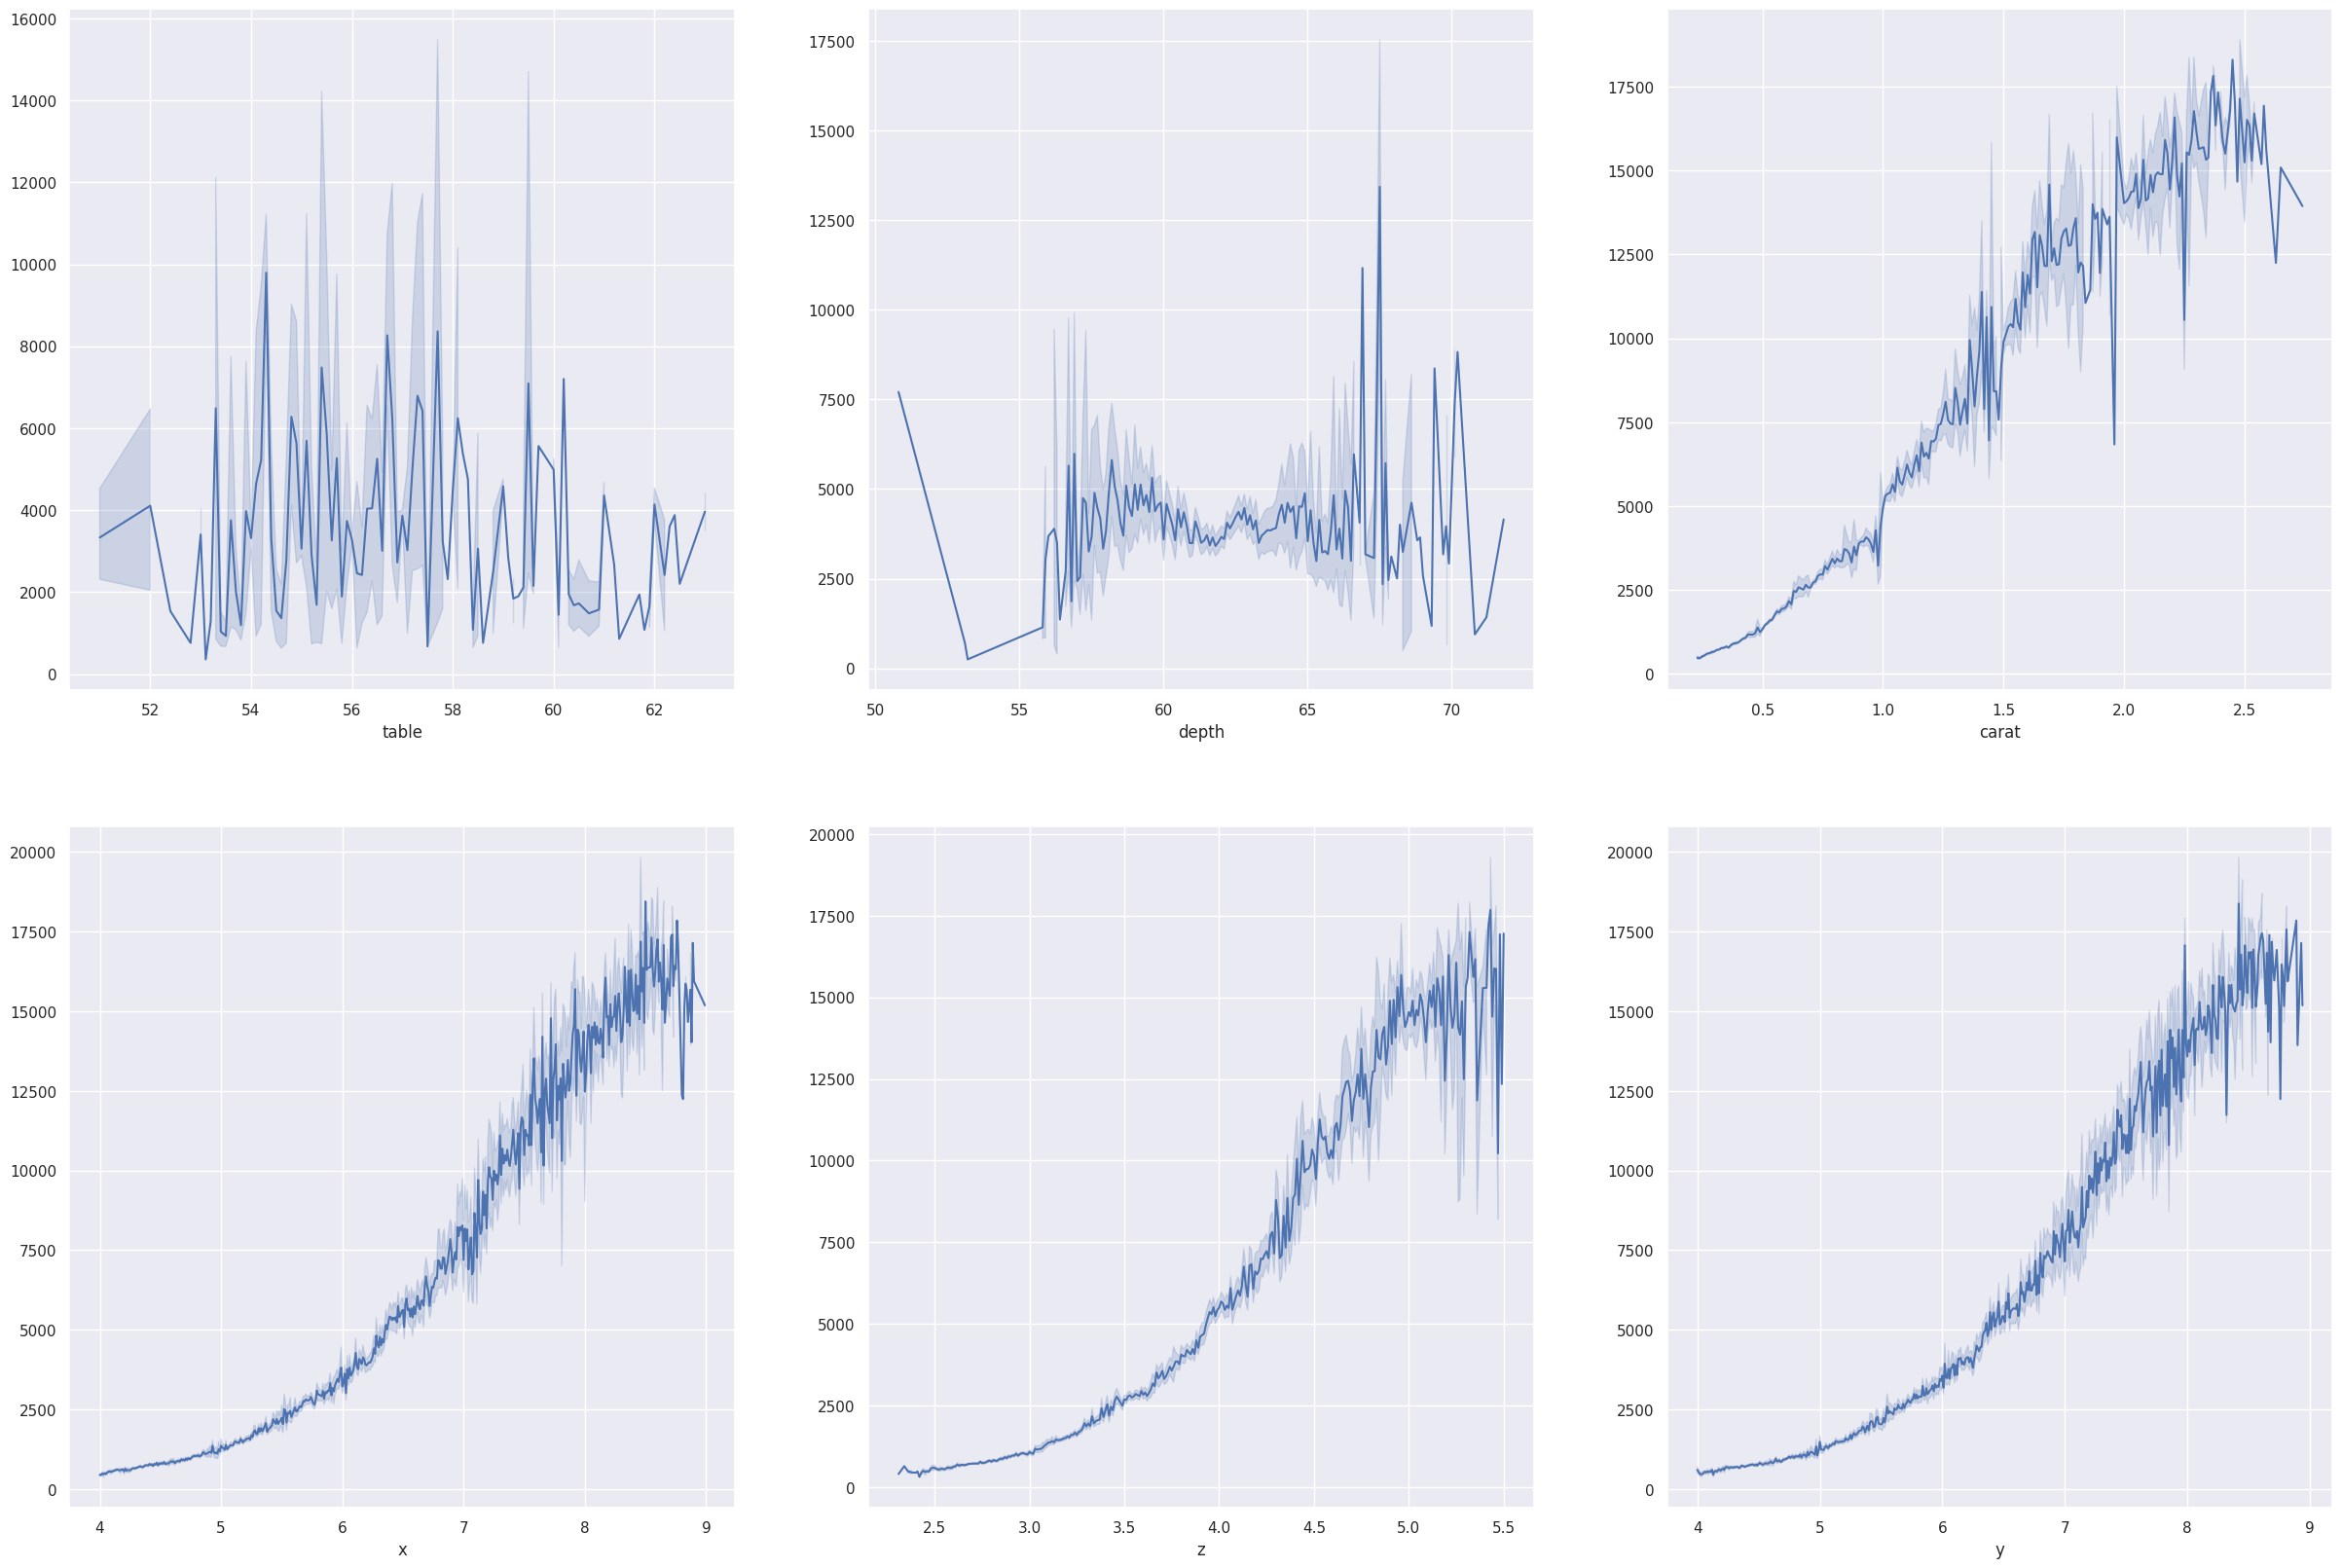

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
six_plots(X_test, y_pred)

In [121]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


Другой тип регрессии

Bayesian Ridge Regression


In [122]:
import pandas as pd
from numpy import arange
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import RepeatedKFold

In [123]:
model = BayesianRidge()
model.fit(X_train, y_train)


BayesianRidge()

In [124]:

y_pred = model.predict(X_test)
model_stats(model, X_train, y_train, X_test, y_test, y_pred)

Train score: 0.9172
Test score: 0.9140
R2 score: 0.91403 
MSE score: 1352566.310 


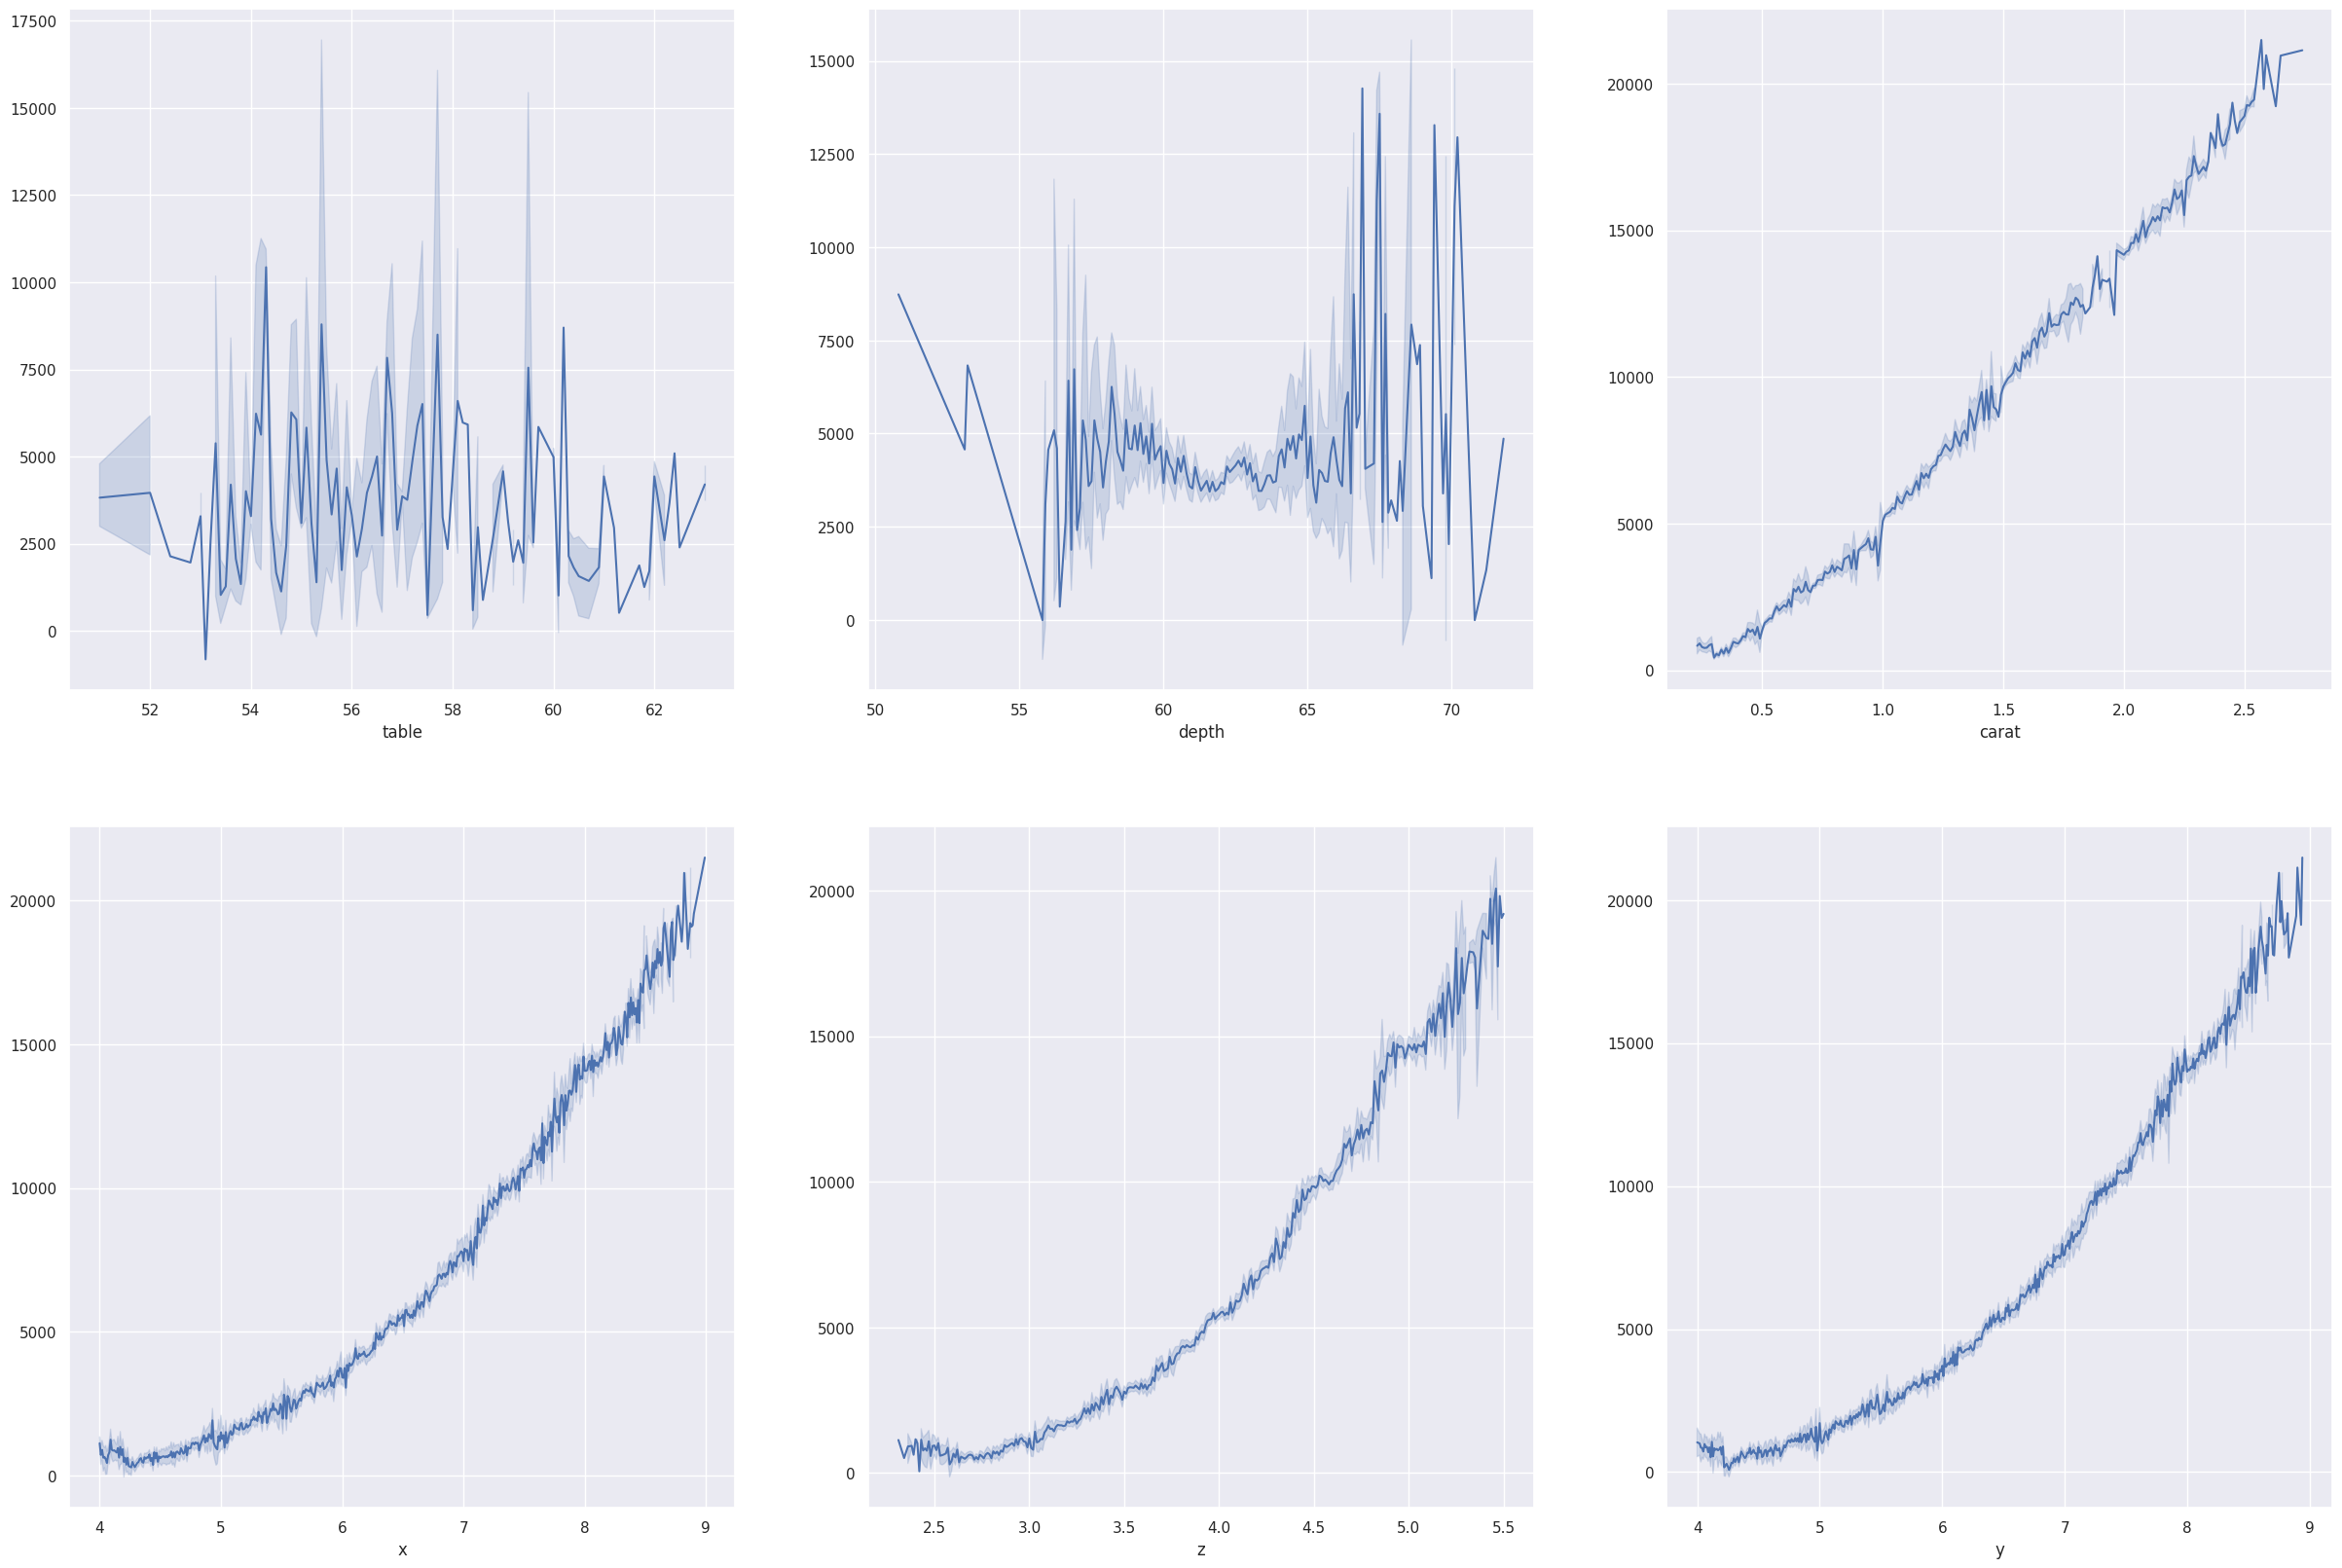

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
six_plots(X_test, y_pred)